# Training Galay Morphologies with EFIGI

In this tutorial the training of galaxiy images of the [EFIGI (Extraction de Formes Idealisées de Galaxies en Imagerie) project](https://www.astromatic.net/projects/efigi) in respect of their morphology will be presented.

In [1]:
import pink
import tools
import numpy as np

myiter = iter(tools.DataIterator("data/Morphology_EFIGI_g.bin"))
images = np.array(list(myiter))

print(images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

version: 2
file_type: 0
data_type: 0
number_of_images: 4458
layout: 0
dimensionality: 2
dimensions: [255 255]
size: 65025
(4457, 255, 255)
min value:  0.0
max value:  1.0


## Show the first 25 images.

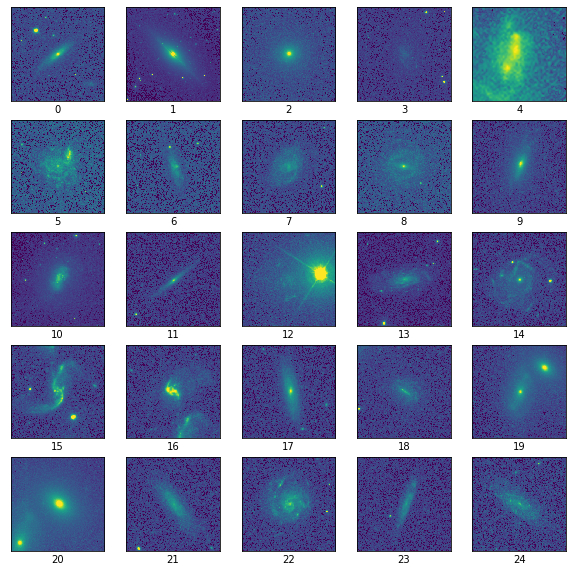

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(i)

In [3]:
import math

som_dim = 8
neuron_dim = int(myiter.dimensions[0] / math.sqrt(2.0) * 2.0)
euclid_dim = int(myiter.dimensions[0] * math.sqrt(2.0) / 2.0)
print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-2d")

trainer = pink.Trainer(som, number_of_rotations=180, euclidean_distance_dim=euclid_dim)

neuron_dim =  360
euclid_dim =  180


In [4]:
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(len(images))):
    trainer(pink.Data(images[i]))

After the training with all 4458 images the SOM looks like following:

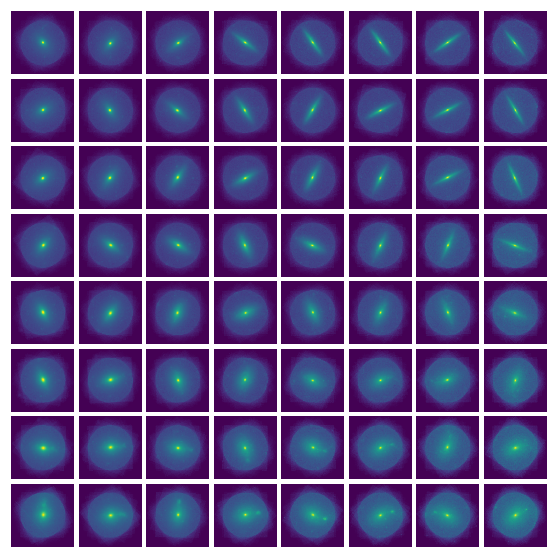

In [5]:
trainer.update_som()
np_som = np.array(som, copy=True)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(tools.show(som, border=25), cmap="viridis")

In [6]:
mapper = pink.Mapper(som, euclidean_distance_dim=euclid_dim)

best_match = np.zeros(images.shape[0], dtype='i')
for i in tqdm_notebook(range(len(images))):
    euclidean_distances, _ = mapper(pink.Data(images[i]))
    best_match[i] = np.amax(euclidean_distances)

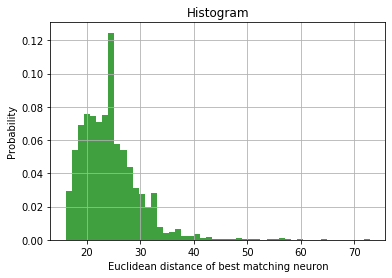

In [7]:
plt.hist(best_match, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Euclidean distance of best matching neuron')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()

To visualize the images which do not fit to all neurons very well (outliers), the best matching euclidean distances will be sorted descendent. In the following the 25 images with the largest euclidean distances will be shown. The best matching euclidean distance is given as label.

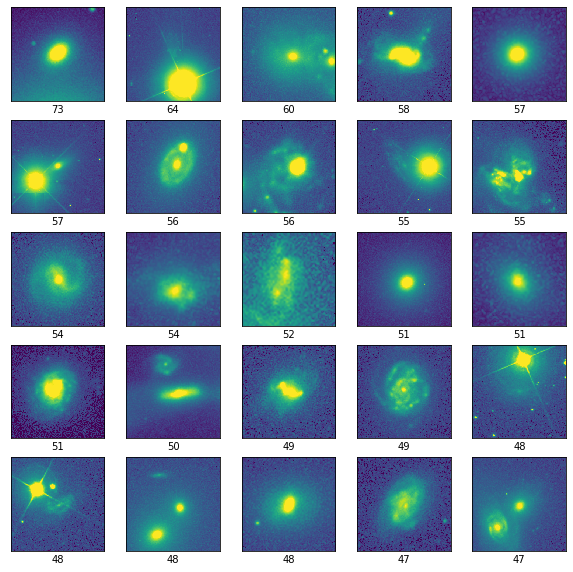

In [8]:
best_match_sorted_indices = (-best_match).argsort()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[best_match_sorted_indices[i]])
    plt.xlabel(best_match[best_match_sorted_indices[i]])